In [65]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
import Liquidation_Permanent_Price_Impact_helper as lppi_helpers

In [78]:
# Set up parameters
S0 = 130
R = 10 ** 7 #Initial number of share needed to liquid
T = 1; 
k = 0.002;  # Temporary price impact on execution price
b = 0.002;  # Permanent price impact on midprice
M = 5000;   # Number of trading times
alpha = 0.1; # Terminal liquidation penalty
phi = 0.01;  # Running inventory penalty
sigma = 0.30; # Volatility

In [79]:
gamma = np.sqrt(phi/k);
xi = (alpha - 0.5 * b + np.sqrt(k * phi))/(alpha - 0.5 * b - np.sqrt(k * phi));

In [80]:
tt = np.linspace(0, 1, M + 1)

## Optiomal trading speed and inventory

In [81]:
v = np.zeros((M + 1, 1))
q = np.zeros((M + 1, 1))
v[0] = 0
q[0] = R  
for t in range(1, M + 1): 
    v[t] = gamma * (xi * np.exp(gamma * (T-tt[t-1])) + np.exp(- gamma * (T-tt[t-1]))) / (xi * np.exp(gamma * (T-tt[t-1])) - np.exp(- gamma * (T-tt[t-1]))) * q[t-1] * T/M
    q[t] = (xi * np.exp(gamma * (T-tt[t-1])) - np.exp(- gamma * (T-tt[t-1]))) / (xi * np.exp(gamma * T) - np.exp(- gamma * T)) * R

Text(0.5, 1.0, 'Trading Speed')

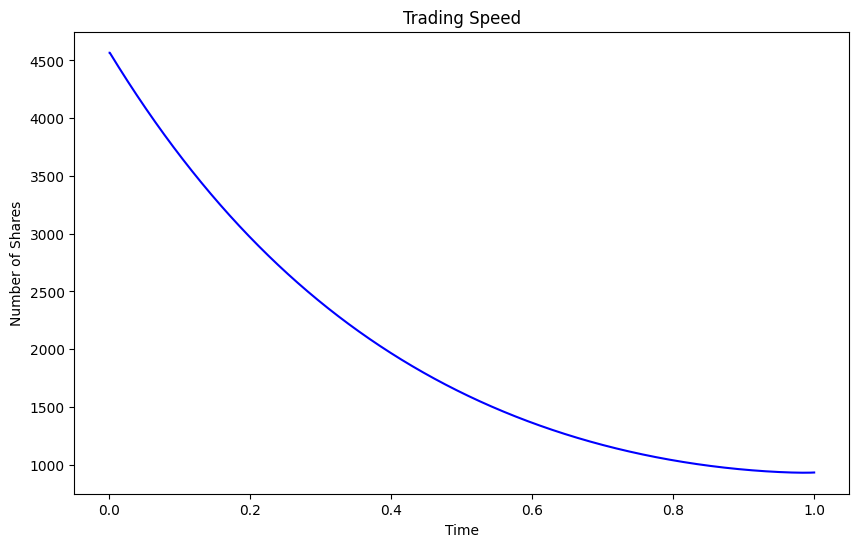

In [82]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], v[1:], 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.title('Trading Speed')

Text(0.5, 1.0, 'Inventory')

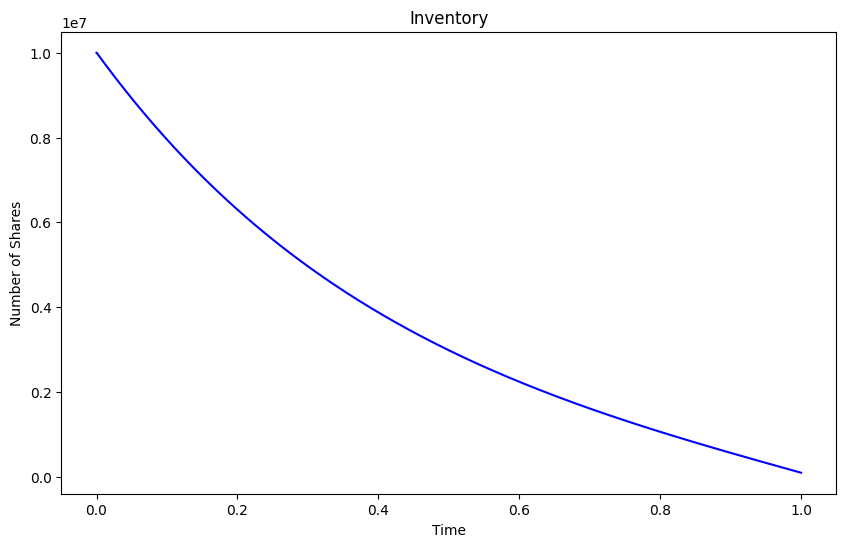

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(tt, q, 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.title('Inventory')

## Difference scenarios with diffrent alpha and phi 

In [86]:
# Parameter settings
Ndt = 6.5 * 3600
dt = T / Ndt
t = np.arange(0, T + dt, dt)

tt = np.arange(0, 1 + 1 / 10, 1 / 10)
tau = T - t

myphi = np.array([10e-10, 0.001, 0.01, 0.1])
symb = np.array(["o", "*", "+", "^"])

alpha = 100

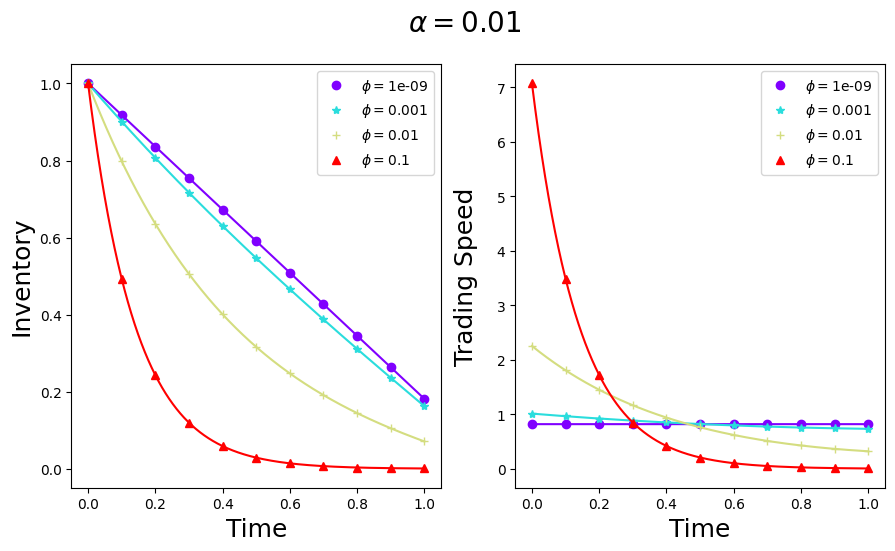

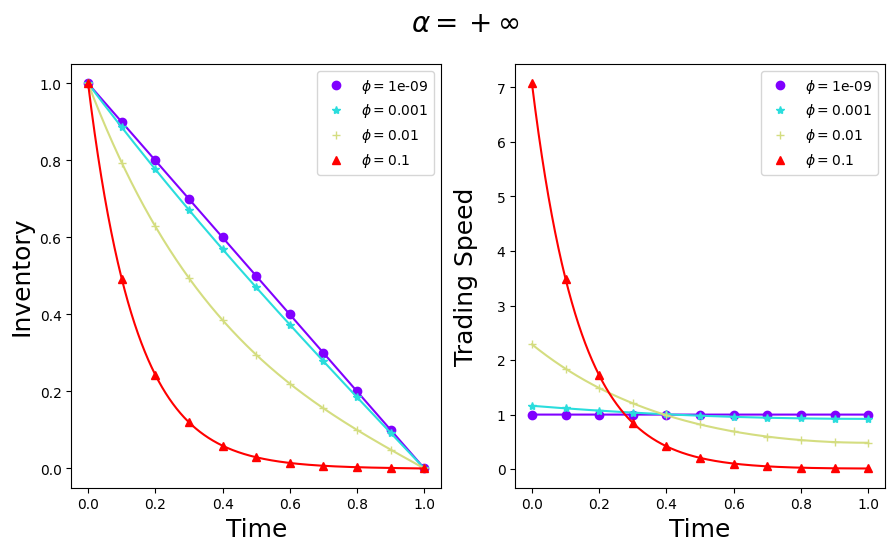

In [87]:
# Fig 6.2 of Page 148
lppi_helpers.plot_inventory_trading_speed(0.01, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = 0.01$")
lppi_helpers.plot_inventory_trading_speed(100, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = +\infty$")